# Machine Learning
# Assignment 3: SVM

Please write your full name here
- **Name** : "Somaia Ahmed Abdelrahman"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment3_FirstnameLastname.ipynb"
- Late submissions will be penalized.

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

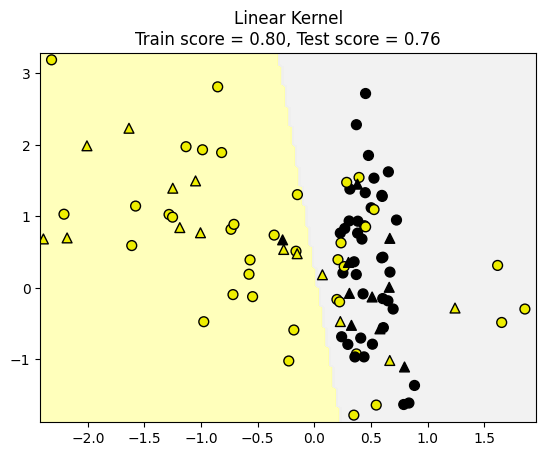

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, title='Linear Kernel')

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

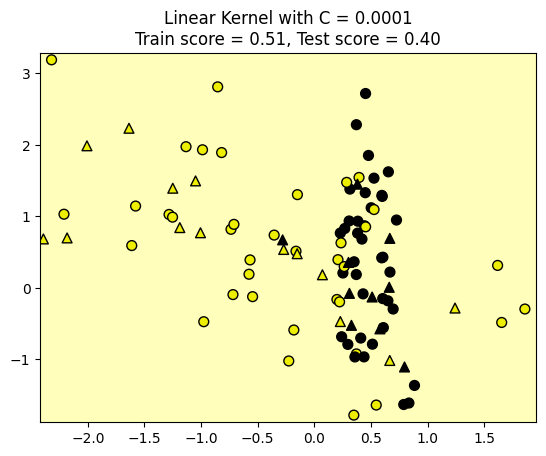

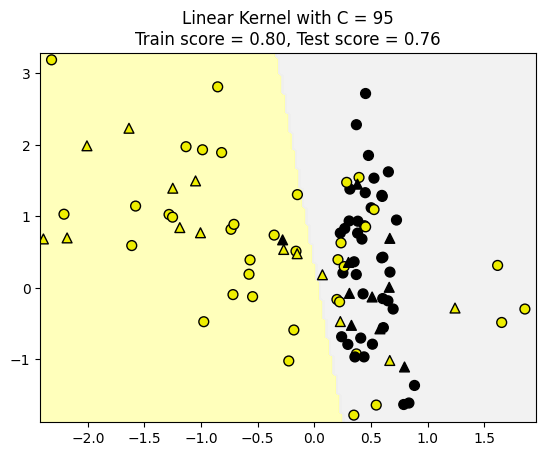

In [ ]:
clf_C1 = SVC(C =0.0001 ,kernel='linear').fit(X_train, y_train)
plot_class_regions_for_classifier(clf_C1, X_train, y_train, X_test, y_test, title='Linear Kernel with C = 0.0001')

clf_C2 = SVC(C =95 ,kernel='linear').fit(X_train, y_train)
plot_class_regions_for_classifier(clf_C2, X_train, y_train, X_test, y_test, title='Linear Kernel with C = 95')

### C = 0.0001
* Very low accuracy (Train score = 0.51, Test score = 0.40).


* This is a classic case of underfitting: the model is too simple to separate the classes well.

### C = 95
* Much higher accuracy — the model tries to fit the training data more closely.

* The decision boundary is more aligned with the actual distribution of data points.


### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt', delim_whitespace=True)
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

<ipython-input-7-6ecac3d643ba>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fruits = pd.read_table('fruit_data_with_colors.txt', delim_whitespace=True)


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [ ]:
print(fruits.columns)

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [ ]:
from sklearn.svm import LinearSVC
X_fruits = fruits[['width','height']]
y_fruits = fruits['fruit_label']

X_train_fruits, X_test_fruits, y_train_fruits, y_test_fruits = train_test_split(X_fruits, y_fruits, random_state=0, test_size=0.25)

clf_fruit = LinearSVC().fit(X_train_fruits, y_train_fruits)

print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))


Train accuracy: 0.8
Test accuracy: 0.76


#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [ ]:
# Number of classes = number of SVM models (one vs rest)
num_classes = len(clf_fruit.classes_)
print(f"Number of SVM models trained: {num_classes} as it uses one-vs-rest approach")

# Print coefficients and intercepts
print("\nModel coefficients (for each class):")
print(clf_fruit.coef_)

print("\nModel intercepts (for each class):")
print(clf_fruit.intercept_)

# Print corresponding class labels
print("\nClass labels:")
print(clf_fruit.classes_)


Number of SVM models trained: 4 as it uses one-vs-rest approach

Model coefficients (for each class):
[[ 0.47594355 -0.28037302]
 [ 0.78948855 -1.10758759]
 [ 0.21300773 -0.03929154]
 [-1.26248135  1.01073208]]

Model intercepts (for each class):
[-1.5126779   0.7872759  -1.67988201  0.3759239 ]

Class labels:
[1 2 3 4]


 Number of models = Number of class labels

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.
(plot it any way you can)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


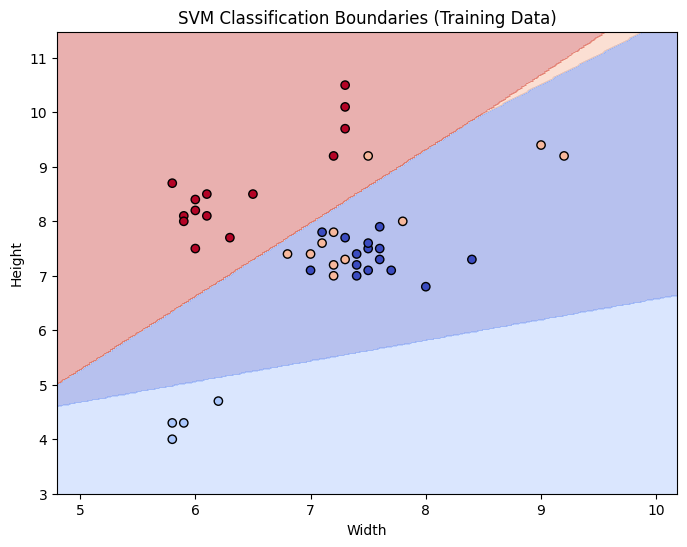

In [ ]:
def plot_svm_boundaries(X, y, model, title):
    h = 0.02  # step size in the mesh

    # Access width (X[:, 0]) and height (X[:, 1])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(title)
    plt.show()


# Call the plotting function
plot_svm_boundaries(X_train_fruits.values, y_train_fruits.values, clf_fruit,
                    "SVM Classification Boundaries (Training Data)")


 Use the breast cancer dataset in question 7, 8, and9.

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, random_state=0, test_size=0.25)

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}

# pipeline = Pipeline([('scaler', StandardScaler()),
#                      ('svm', SVC())])

grid_search = GridSearchCV(SVC(), parameters, cv=5)
grid_search.fit(X_train_cancer, y_train_cancer)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
clf_cancer = SVC(kernel = 'rbf', C = 10).fit(X_train_cancer, y_train_cancer)
train_pred_cancer = clf_cancer.predict(X_train_cancer)
test_pred_cancer = clf_cancer.predict(X_test_cancer)

train_acc = accuracy_score(y_train_cancer, train_pred_cancer)
test_acc = accuracy_score(y_test_cancer, test_pred_cancer)


print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.92
Testing Accuracy: 0.94


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Train new SVM model with best parameters
best_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=10)
)

best_model.fit(X_train_cancer, y_train_cancer)

# Predict on training and test sets
train_preds = best_model.predict(X_train_cancer)
test_preds = best_model.predict(X_test_cancer)

# Calculate and print accuracy
train_acc_better = accuracy_score(y_train_cancer, train_preds)
test_acc_better = accuracy_score(y_test_cancer, test_preds)

print(f"Training Accuracy: {train_acc_better:.2f}")
print(f"Testing Accuracy: {test_acc_better:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.99
